In [40]:
import pandas as pd
import geopandas as gpd
import urllib.request
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl


In [2]:
for year in [2021]:
    for month in range(1,13):
        urllib.request.urlretrieve ("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_%s-%s.parquet"%(str(year),str(month).rjust(2, '0')), 
                                    "yellow_taxi/yellow_tripdata_%s-%s.parquet"%(str(year),str(month).rjust(2, '0')))

In [3]:
files = os.listdir('yellow_taxi/')
dflist = []
for index, filename in enumerate(files):
    if '.parquet' in filename:
        if index == 0:
            df = pd.read_parquet('yellow_taxi/' + filename)
        else:
            df = pd.read_parquet('yellow_taxi/' + filename)
        dflist.append(df)
dfTaxi_yellow = pd.concat(dflist, axis = 0, ignore_index = True)
dfTaxi_yellow.count()

VendorID                 30904308
tpep_pickup_datetime     30904308
tpep_dropoff_datetime    30904308
passenger_count          29425613
trip_distance            30904308
RatecodeID               29425613
store_and_fwd_flag       29425613
PULocationID             30904308
DOLocationID             30904308
payment_type             30904308
fare_amount              30904308
extra                    30904308
mta_tax                  30904308
tip_amount               30904308
tolls_amount             30904308
improvement_surcharge    30904308
total_amount             30904308
congestion_surcharge     29425613
airport_fee              25262890
dtype: int64

In [4]:
dfTaxi_yellow

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.00,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.00,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.00,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.00,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.50,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30904303,2,2021-12-31 23:18:02,2021-12-31 23:32:19,NaN,3.99,NaN,None,145,107,0,17.42,0.0,0.5,5.80,0.0,0.3,26.52,NaN,NaN
30904304,2,2021-12-31 23:46:00,2022-01-01 00:07:00,NaN,5.96,NaN,None,236,158,0,23.05,0.0,0.5,2.85,0.0,0.3,29.20,NaN,NaN
30904305,2,2021-12-31 23:46:00,2022-01-01 00:04:00,NaN,4.99,NaN,None,48,13,0,20.97,0.0,0.5,5.23,0.0,0.3,29.50,NaN,NaN
30904306,2,2021-12-31 23:53:00,2022-01-01 00:02:00,NaN,1.36,NaN,None,75,75,0,13.20,0.0,0.5,2.00,0.0,0.3,16.00,NaN,NaN


In [5]:
taxi = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')

In [6]:
taxi.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [7]:
dfTaxi_yellow=dfTaxi_yellow.dropna()

In [8]:
dfTaxi_yellow

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
157615,1,2021-01-05 18:55:22,2021-01-05 19:04:57,2.0,5.10,1.0,Y,262,232,1,15.5,3.0,0.5,3.85,0.00,0.3,23.15,2.5,0.0
159867,1,2021-01-05 19:58:59,2021-01-05 20:04:58,1.0,2.00,1.0,Y,262,162,2,8.0,2.5,0.5,0.00,0.00,0.3,11.30,2.5,0.0
161304,1,2021-01-05 20:12:38,2021-01-05 20:22:53,1.0,2.10,1.0,Y,234,230,1,9.5,2.5,0.5,2.55,0.00,0.3,15.35,2.5,0.0
161305,1,2021-01-05 20:26:52,2021-01-05 20:51:27,1.0,10.30,1.0,Y,230,138,2,30.0,2.5,0.5,0.00,6.55,0.3,39.85,2.5,0.0
449168,1,2021-01-12 18:34:41,2021-01-12 18:37:18,1.0,0.70,1.0,Y,265,265,3,4.5,1.0,0.5,0.00,0.00,0.3,6.30,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30801932,2,2021-12-31 23:27:31,2021-12-31 23:32:32,2.0,0.95,1.0,N,164,137,1,5.5,0.5,0.5,1.70,0.00,0.3,11.00,2.5,0.0
30801933,2,2021-12-31 23:20:49,2021-12-31 23:21:59,1.0,0.16,1.0,N,162,229,2,3.0,0.5,0.5,0.00,0.00,0.3,6.80,2.5,0.0
30801934,2,2021-12-31 23:07:23,2021-12-31 23:12:45,2.0,1.05,1.0,N,237,229,1,6.0,0.5,0.5,2.45,0.00,0.3,12.25,2.5,0.0
30801935,2,2021-12-31 23:18:30,2021-12-31 23:31:20,1.0,2.31,1.0,N,141,239,1,11.0,0.5,0.5,1.00,0.00,0.3,15.80,2.5,0.0


In [9]:
dfTaxi_yellow.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [10]:
#only take what we need
dfY=dfTaxi_yellow[['tpep_pickup_datetime','passenger_count', 'trip_distance','PULocationID']]

## all day case

In [11]:
dfY
#this is for general case that all day matters

,tpep_pickup_datetime,passenger_count,trip_distance,PULocationID
157615,2021-01-05 18:55:22,2.0,5.10,262
159867,2021-01-05 19:58:59,1.0,2.00,262
161304,2021-01-05 20:12:38,1.0,2.10,234
161305,2021-01-05 20:26:52,1.0,10.30,230
449168,2021-01-12 18:34:41,1.0,0.70,265
...,...,...,...,...
30801932,2021-12-31 23:27:31,2.0,0.95,164
30801933,2021-12-31 23:20:49,1.0,0.16,162
30801934,2021-12-31 23:07:23,2.0,1.05,237
30801935,2021-12-31 23:18:30,1.0,2.31,141


In [12]:
dfY = dfY.groupby(by='PULocationID', as_index=False).count()[['PULocationID', 'passenger_count']].rename(columns={'passenger_count':'N_trips'})


In [13]:
dfY.sort_values(by='N_trips')

,PULocationID,N_trips
107,110,1
98,99,6
26,27,7
1,2,8
173,176,8
...,...,...
183,186,865196
158,161,929949
129,132,934213
233,236,1157215


## first we plot the general trips per zipcode to see which zipcode has more trips

Text(0.5, 1.0, 'yellow taxi trips by location id')

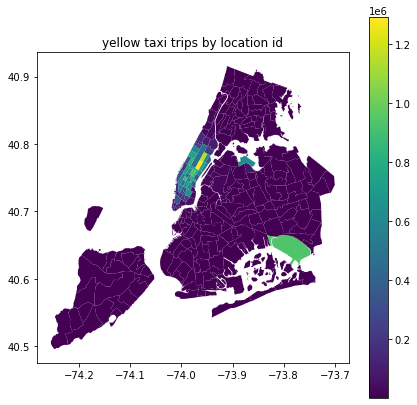

In [14]:
byZip_plot = taxi.merge(dfY, left_on='location_i', right_on='PULocationID')
byZip_plot.plot(column='N_trips', figsize=(7,7), legend=True)
plt.title('yellow taxi trips by location id')

#### This time we normalize our data by calculating the desity of trips, we can see which zipcode has the higher density of trips count.

Text(0.5, 1.0, 'normalized yellow taxi trips by location id')

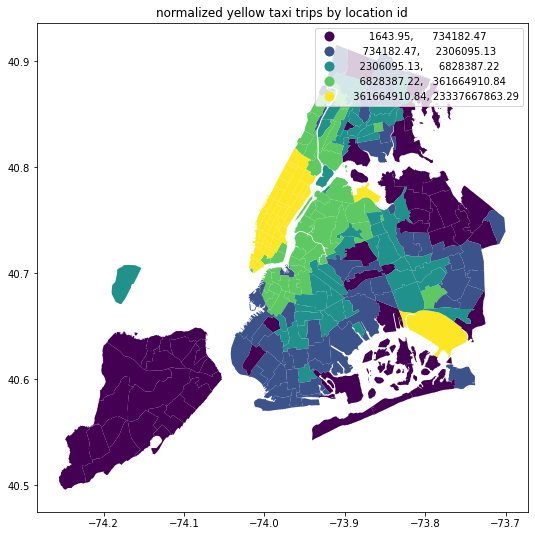

In [15]:
# normalize number of complaints by area and plot

# convert sq.ft. to sq.miles
byZip_plot['area_sqMile'] = byZip_plot['shape_area']
# divide by area
byZip_plot['complaints_norm'] = byZip_plot['N_trips']/byZip_plot['area_sqMile']
byZip_plot.plot(column='complaints_norm', figsize=(9,9), scheme='quantiles', legend=True)
plt.title('normalized yellow taxi trips by location id')

In [16]:
# here we will focus on the rush hours of the day

In [14]:
df=dfTaxi_yellow[['tpep_pickup_datetime','passenger_count', 'trip_distance','PULocationID']]
df

,tpep_pickup_datetime,passenger_count,trip_distance,PULocationID
157615,2021-01-05 18:55:22,2.0,5.10,262
159867,2021-01-05 19:58:59,1.0,2.00,262
161304,2021-01-05 20:12:38,1.0,2.10,234
161305,2021-01-05 20:26:52,1.0,10.30,230
449168,2021-01-12 18:34:41,1.0,0.70,265
...,...,...,...,...
30801932,2021-12-31 23:27:31,2.0,0.95,164
30801933,2021-12-31 23:20:49,1.0,0.16,162
30801934,2021-12-31 23:07:23,2.0,1.05,237
30801935,2021-12-31 23:18:30,1.0,2.31,141


In [15]:
df['pickUpHour'] = df['tpep_pickup_datetime'].dt.hour

In [16]:
df

,tpep_pickup_datetime,passenger_count,trip_distance,PULocationID,pickUpHour
157615,2021-01-05 18:55:22,2.0,5.10,262,18
159867,2021-01-05 19:58:59,1.0,2.00,262,19
161304,2021-01-05 20:12:38,1.0,2.10,234,20
161305,2021-01-05 20:26:52,1.0,10.30,230,20
449168,2021-01-12 18:34:41,1.0,0.70,265,18
...,...,...,...,...,...
30801932,2021-12-31 23:27:31,2.0,0.95,164,23
30801933,2021-12-31 23:20:49,1.0,0.16,162,23
30801934,2021-12-31 23:07:23,2.0,1.05,237,23
30801935,2021-12-31 23:18:30,1.0,2.31,141,23


## Here we will have a look at the situation of the morning rush hour, i.e  7 am- 9 am

In [19]:
index1=(df.pickUpHour>6)&(df.pickUpHour<10)

In [20]:
dfmor=df[index1]

In [21]:
dfmor

,tpep_pickup_datetime,passenger_count,trip_distance,PULocationID,pickUpHour
4261833,2021-03-27 07:07:01,1.0,8.10,236,7
4261834,2021-03-27 07:32:19,1.0,2.70,231,7
4262873,2021-03-27 08:23:14,1.0,1.20,68,8
4262874,2021-03-27 08:34:25,1.0,2.00,90,8
4262875,2021-03-27 08:47:50,1.0,2.70,237,8
...,...,...,...,...,...
30747171,2021-12-31 09:59:13,1.0,4.20,186,9
30747228,2021-12-31 09:59:44,1.0,1.82,170,9
30747249,2021-12-31 09:58:06,1.0,1.92,141,9
30747426,2021-12-31 09:59:49,1.0,4.87,242,9


In [26]:
dfmor.columns

Index(['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
       'PULocationID', 'pickUpHour'],
      dtype='object')

In [23]:
dfmor=dfmor.groupby(by='PULocationID', as_index=False).agg({'pickUpHour':'count', 
                                                        'trip_distance': 'sum', 'passenger_count': 'sum'})

In [24]:
dfmor.rename(columns={'pickUpHour':'N_trips'}, inplace=True)

In [25]:
dfmor['ave_dis'] = dfmor.trip_distance/dfmor.N_trips

In [26]:
dfmor['ave_pas'] = dfmor.passenger_count/dfmor.N_trips

In [27]:
dfmor=dfmor[['PULocationID','ave_dis', 'ave_pas','N_trips']]

We get started from n=2 and use k-means clustering. Let's see what will happen.

In [28]:
dfmor1=dfmor[['PULocationID', 'ave_dis', 'N_trips']]

In [31]:
dfmor_log['logN_trips'] = np.log10(dfmor_log['N_trips'])

In [32]:
dfmor_log['ave_dis'] = dfmor_log['ave_dis']/4

In [33]:
dfmor_log

,PULocationID,ave_dis,N_trips,logN_trips
0,1,0.278540,346,2.539076
1,3,0.735083,30,1.477121
2,4,0.703586,1650,3.217484
3,5,5.769722,9,0.954243
4,6,6.978750,2,0.301030
...,...,...,...,...
253,261,1.128631,7592,3.880356
254,262,0.645135,71049,4.851558
255,263,0.644991,81747,4.912472
256,264,1.061363,18890,4.276232


In [34]:
dfmor_log.describe()

,PULocationID,ave_dis,N_trips,logN_trips
count,258.000000,258.000000,258.000000,258.000000
mean,133.837209,1.340304,10670.728682,2.500421
std,76.614126,1.355585,26323.274476,1.280225
min,1.000000,0.000000,1.000000,0.000000
25%,67.250000,0.637227,50.000000,1.698970
50%,135.500000,0.905238,158.500000,2.200027
75%,199.750000,1.316391,2276.500000,3.353213
max,265.000000,9.162615,169228.000000,5.228472



Cluster centers:
 [[0.95685692 2.64183288]
 [4.76183586 1.23858912]]

Sum of squared errors: 508.9554029991112

Cluster centers:
 [[1.02103746 1.91233098]
 [4.76183586 1.23858912]
 [0.8142335  4.2629482 ]]

Sum of squared errors: 232.46700245656388

Cluster centers:
 [[0.97170424 1.9018232 ]
 [0.8142335  4.2629482 ]
 [6.62606431 0.98439552]
 [3.34756789 1.59760583]]

Sum of squared errors: 169.18606041200857

Cluster centers:
 [[0.96347874 2.28637114]
 [6.62606431 0.98439552]
 [3.34756789 1.59760583]
 [0.79724569 4.37916951]
 [0.9896443  1.24081672]]

Sum of squared errors: 132.74413070525722

Cluster centers:
 [[0.62073471 4.67677383]
 [1.04641416 1.16898597]
 [3.51412601 1.6235458 ]
 [1.07100029 3.56392623]
 [6.96683381 0.75651553]
 [0.93876073 2.1481299 ]]

Sum of squared errors: 113.74888881845136

Cluster centers:
 [[0.86106938 0.94466625]
 [0.74467303 4.66126966]
 [3.78183676 1.45284405]
 [0.86295084 2.10747773]
 [6.96683381 0.75651553]
 [0.94912217 3.44710753]
 [1.8847087  1.94

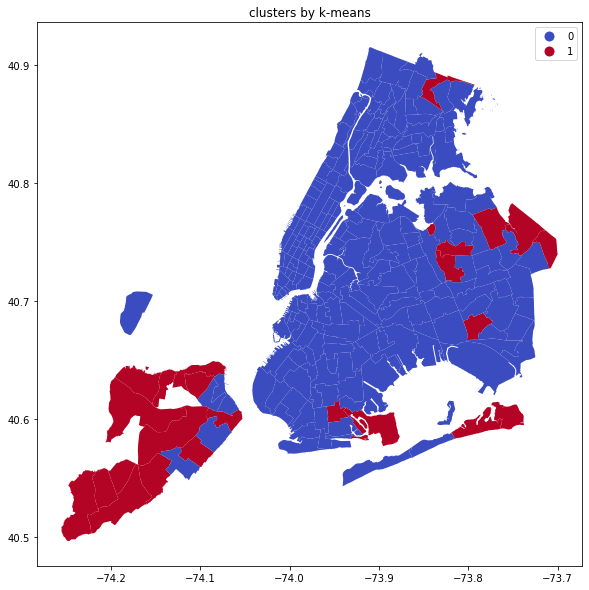

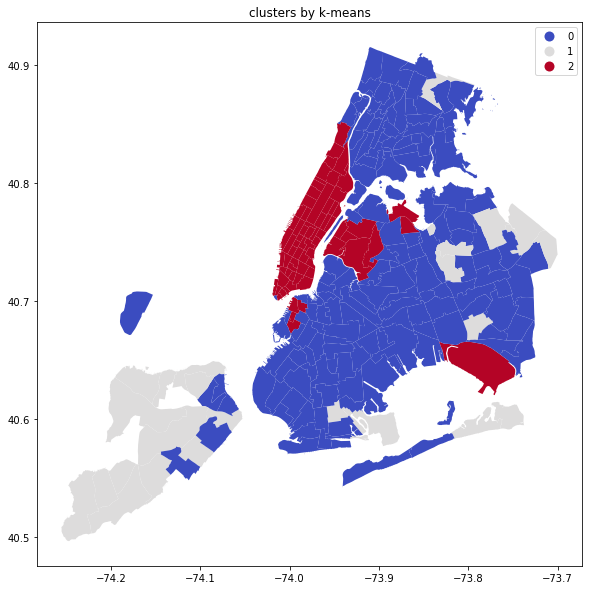

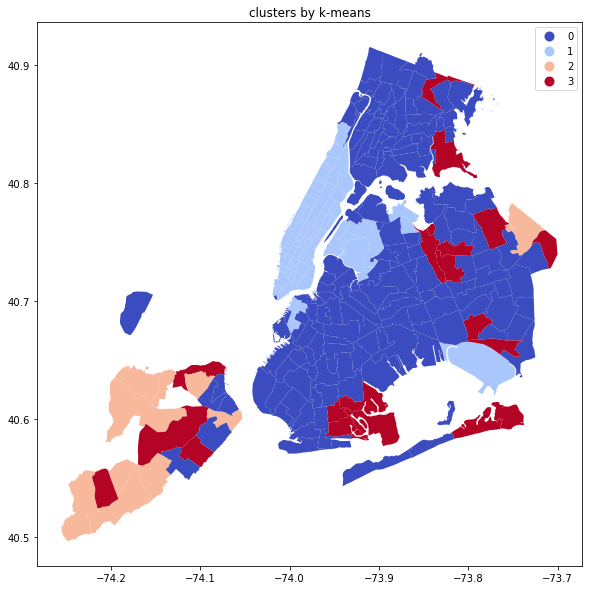

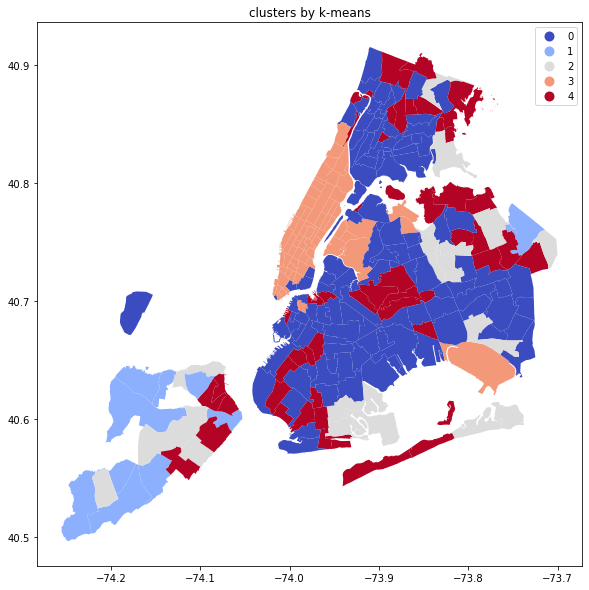

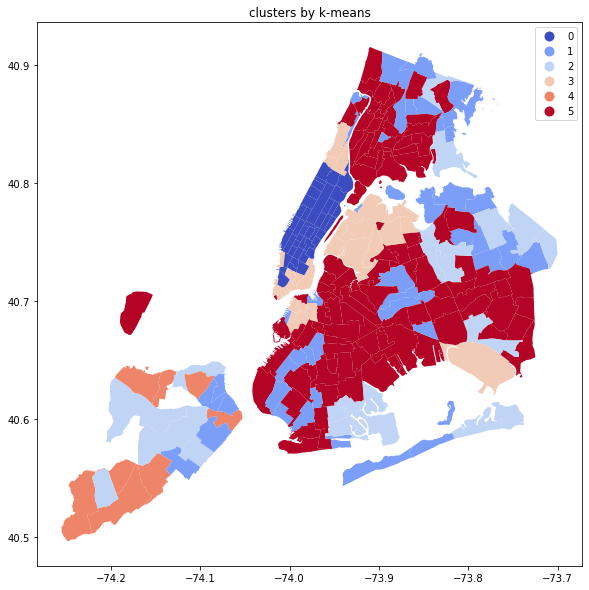

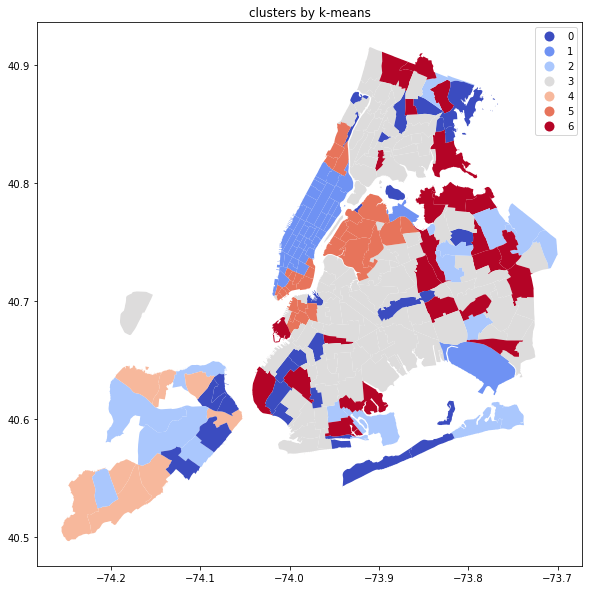

In [36]:
for i in range(6):
    dfmorning=dfmor_log
    km = KMeans(n_clusters=i+2)
    km=km.fit(dfmorning[['ave_dis','logN_trips']])
    dfmorning['cluster']=km.labels_
    dfmorning = taxi.merge(dfmorning, left_on='location_i', right_on='PULocationID')
    dfmorning['cluster'] = dfmorning['cluster'].astype(str)
    
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
    dfmorning.plot(column='cluster',cmap='coolwarm', 
                                          legend=True,ax=ax)
    plt.title('clusters by k-means')
    #print('Cluster assignments:',km.labels_)
    print('\nCluster centers:\n',km.cluster_centers_)
    print('\nSum of squared errors:',km.inertia_)


Cluster centers:
 [[3.08797757 1.65906182]
 [0.84497111 2.73888239]]

Log-likelihood per sample: -2.5683227954544186

Cluster centers:
 [[0.92453708 2.19085528]
 [0.60701426 4.62035767]
 [3.44354683 1.68077401]]

Log-likelihood per sample: -2.2290470379593623

Cluster centers:
 [[2.67536115 1.78792526]
 [0.90304894 2.21875618]
 [7.13985471 0.73029191]
 [0.60666678 4.62199703]]

Log-likelihood per sample: -2.184031350974555

Cluster centers:
 [[3.30282689 1.88024528]
 [0.8740805  2.17781339]
 [7.14633021 0.73301033]
 [0.70697845 4.38023188]
 [1.23999906 1.44735671]]

Log-likelihood per sample: -2.214149967784644

Cluster centers:
 [[3.22438529 1.90475299]
 [0.87496462 2.18447818]
 [9.16261494 2.24054925]
 [0.70433771 4.39446289]
 [1.30535321 1.4423853 ]
 [5.88275429 1.064203  ]]

Log-likelihood per sample: -2.149327393748772

Cluster centers:
 [[3.26249861 1.90095212]
 [0.88088612 2.04756421]
 [9.16261494 2.24054925]
 [0.60026328 4.66750998]
 [1.32003444 1.34351969]
 [6.04810909 0.9839

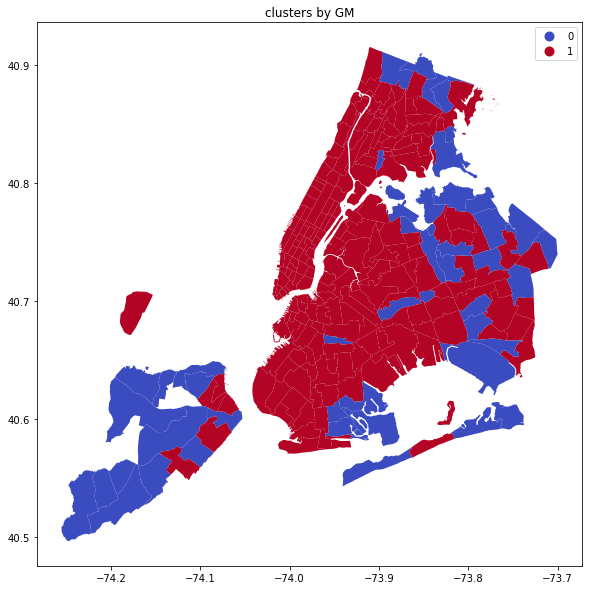

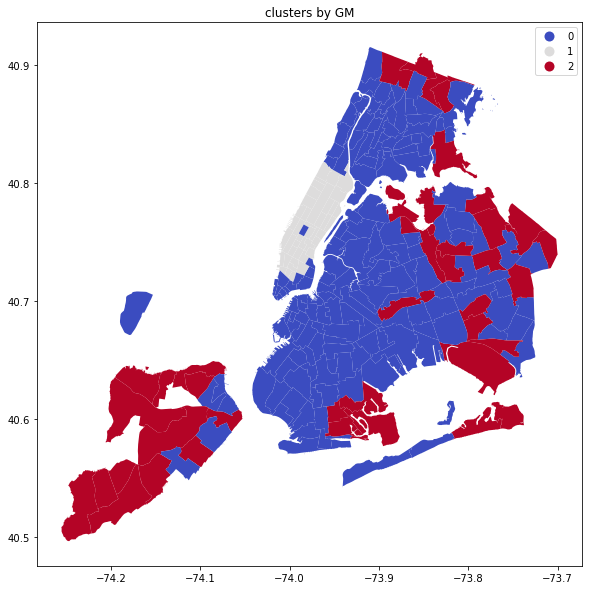

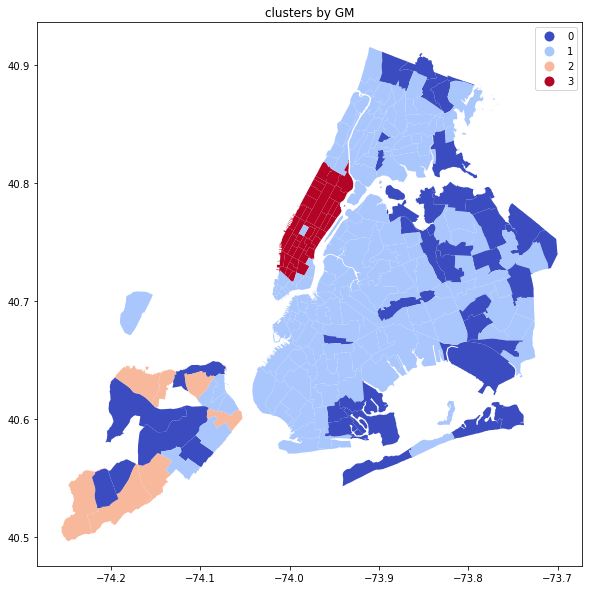

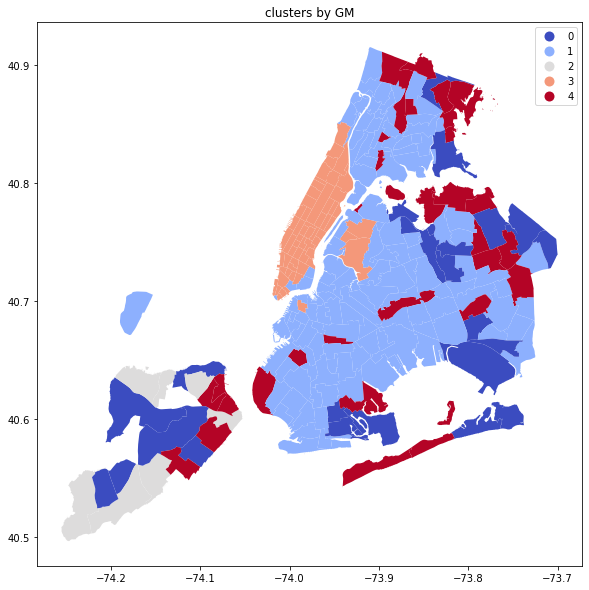

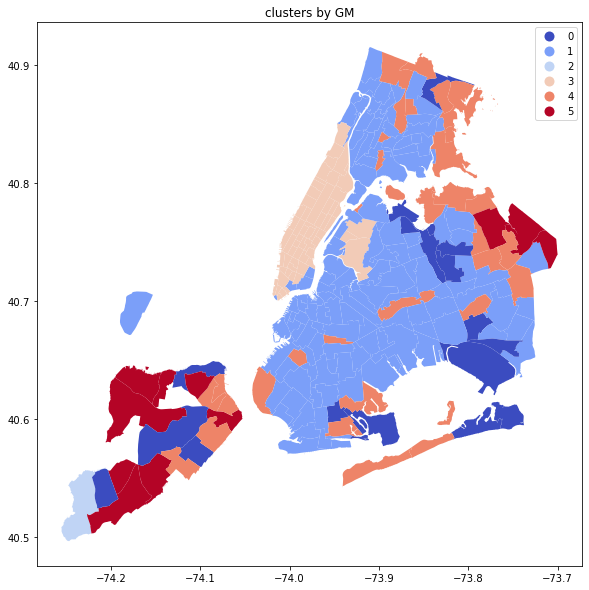

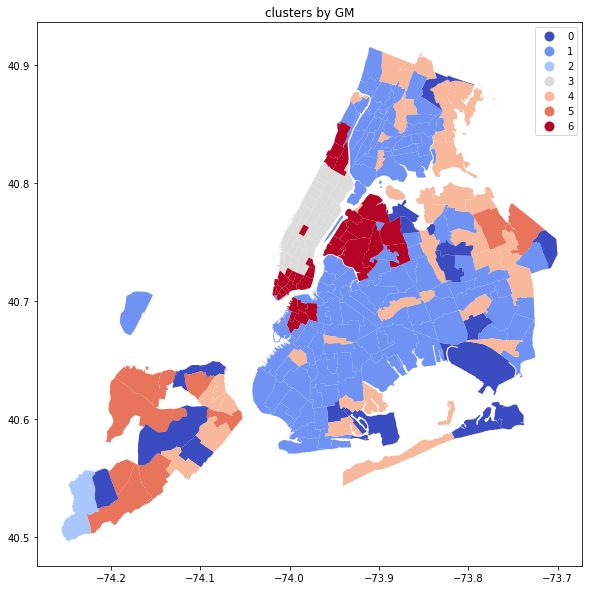

In [41]:
for i in range(6):
    dfmorning=dfmor_log
    gmm = GaussianMixture(n_components=i+2,random_state=100)
    res = gmm.fit(dfmorning[['ave_dis','logN_trips']])
    dfmorning['cluster']=gmm.predict(dfmorning[['ave_dis','logN_trips']])
    dfmorning = taxi.merge(dfmorning, left_on='location_i', right_on='PULocationID')
    dfmorning['cluster'] = dfmorning['cluster'].astype(str)
    
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
    dfmorning.plot(column='cluster',cmap='coolwarm', 
                                          legend=True,ax=ax)
    plt.title('clusters by GM')
    #print('Cluster assignments:',km.labels_)
    print('\nCluster centers:\n',res.means_)
    print('\nLog-likelihood per sample:',res.score(dfmorning[['ave_dis','logN_trips']]))


Cluster centers:
 [[4.22970653]
 [1.80494707]]

Sum of squared errors: 110.9272597872124

Cluster centers:
 [[4.37916951]
 [2.17286083]
 [0.83423323]]

Sum of squared errors: 53.647531087544735

Cluster centers:
 [[3.28691363]
 [0.67935855]
 [4.64691292]
 [2.0053756 ]]

Sum of squared errors: 30.899486618887806

Cluster centers:
 [[4.67481581]
 [2.25016841]
 [0.44539614]
 [3.44757855]
 [1.58443113]]

Sum of squared errors: 17.974810689246326

Cluster centers:
 [[1.52428281]
 [3.83570119]
 [2.11950029]
 [4.76531806]
 [0.44539614]
 [2.78211142]]

Sum of squared errors: 12.501448104901254

Cluster centers:
 [[2.06471147]
 [4.80055677]
 [0.44539614]
 [1.50108085]
 [4.012994  ]
 [3.2203748 ]
 [2.50872579]]

Sum of squared errors: 9.51155191106615


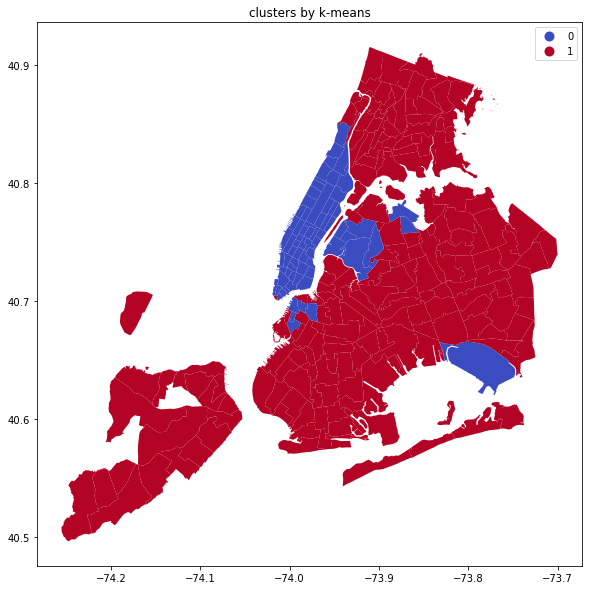

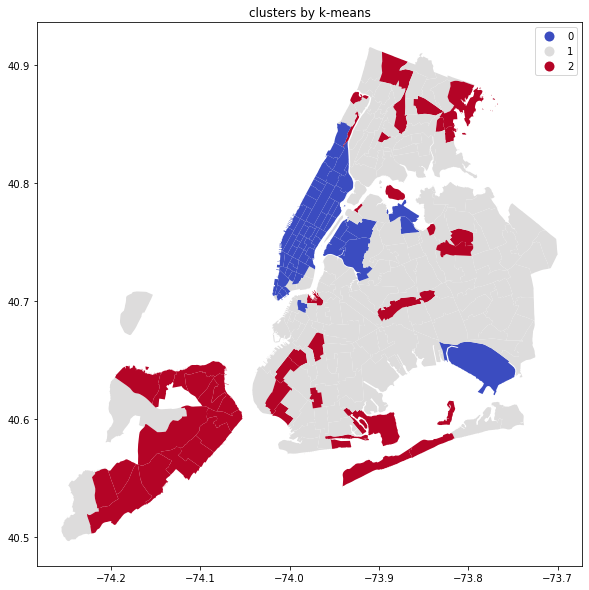

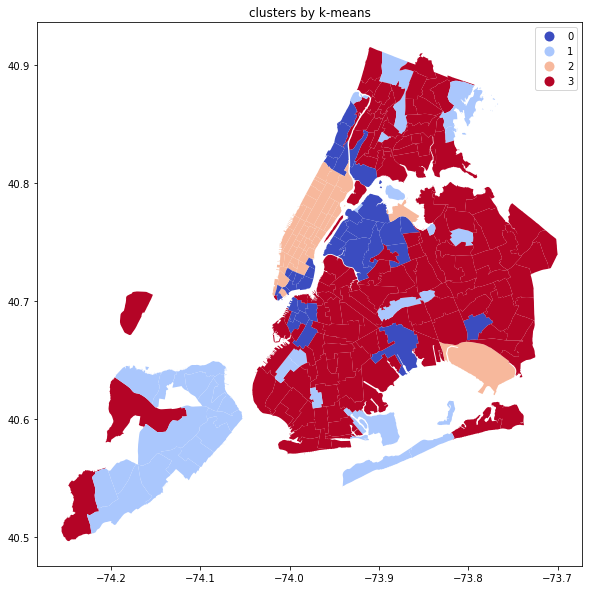

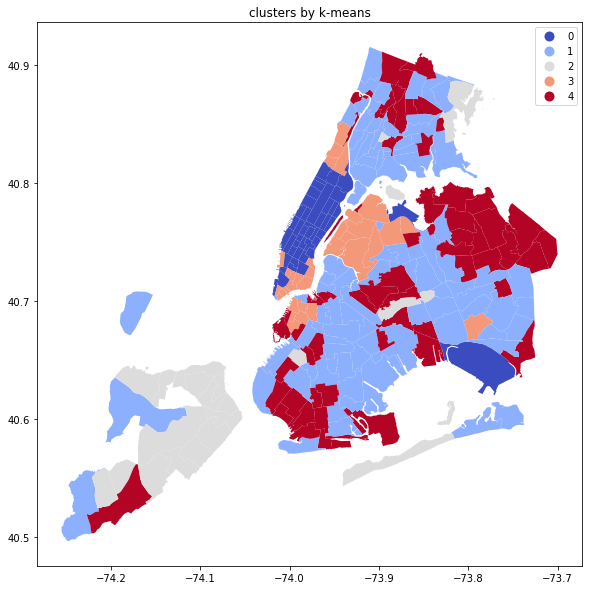

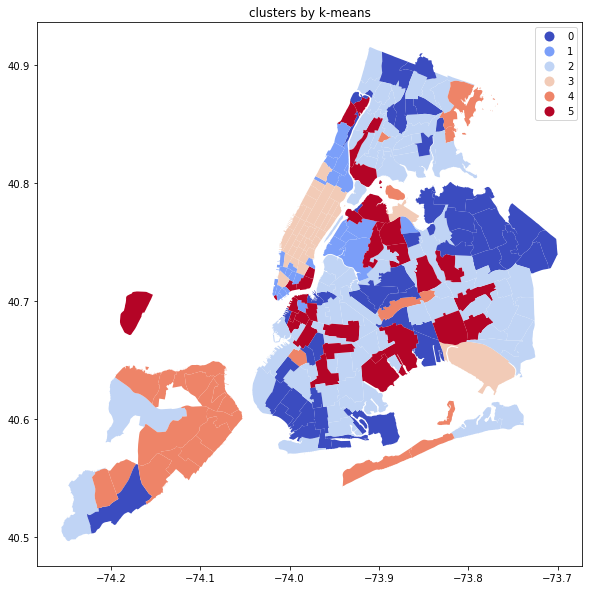

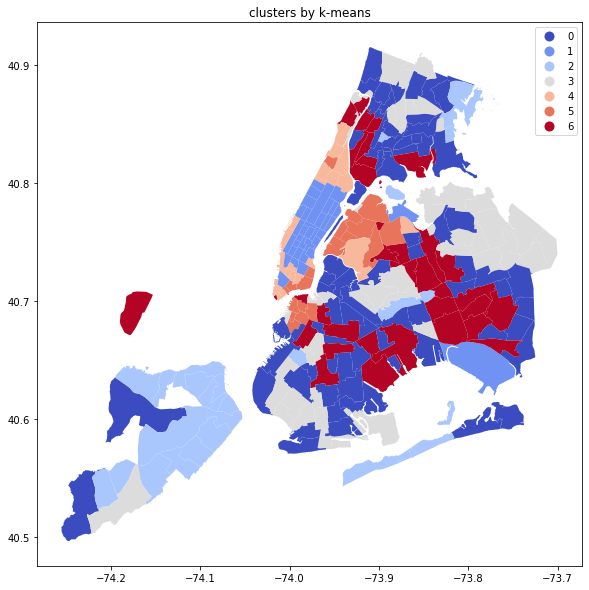

In [39]:
for i in range(6):
    dfmorning=dfmor_log
    km = KMeans(n_clusters=i+2)
    km=km.fit(dfmorning[['logN_trips']])
    dfmorning['cluster']=km.labels_
    dfmorning = taxi.merge(dfmorning, left_on='location_i', right_on='PULocationID')
    dfmorning['cluster'] = dfmorning['cluster'].astype(str)
    
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
    dfmorning.plot(column='cluster',cmap='coolwarm', 
                                          legend=True,ax=ax)
    plt.title('clusters by k-means')
    #print('Cluster assignments:',km.labels_)
    print('\nCluster centers:\n',km.cluster_centers_)
    print('\nSum of squared errors:',km.inertia_)


Cluster centers:
 [[4.48380575]
 [1.93874025]]

Log-likelihood per sample: -1.5106635122455394

Cluster centers:
 [[2.10797302]
 [1.04497875]
 [4.27174058]]

Log-likelihood per sample: -1.4729639164797992

Cluster centers:
 [[3.59669728]
 [1.98819099]
 [4.7788376 ]
 [0.50022605]]

Log-likelihood per sample: -1.4130012134504077

Cluster centers:
 [[2.19950672]
 [1.63650334]
 [4.76753841]
 [0.4503819 ]
 [3.54646657]]

Log-likelihood per sample: -1.4092633305159739

Cluster centers:
 [[2.9777827 ]
 [1.61485107]
 [4.78464502]
 [0.46654305]
 [3.90515961]
 [2.18980523]]

Log-likelihood per sample: -1.4048830430784511

Cluster centers:
 [[2.96166854]
 [1.76096247]
 [4.78633067]
 [0.41579709]
 [3.90758918]
 [2.22586852]
 [1.28807684]]

Log-likelihood per sample: -1.4052319312219095


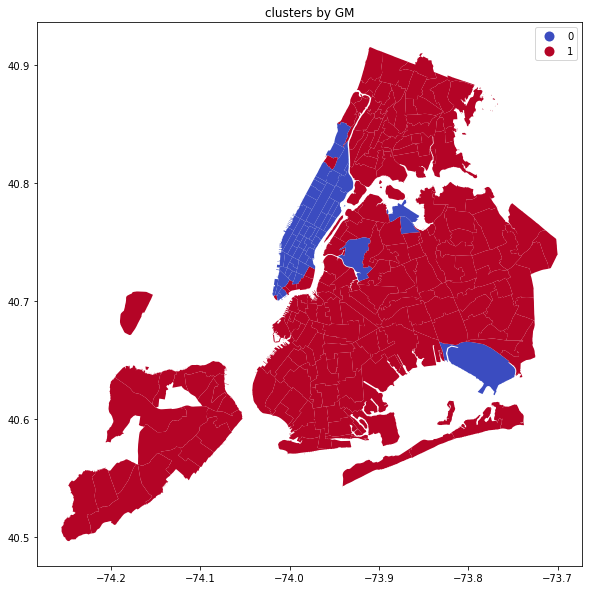

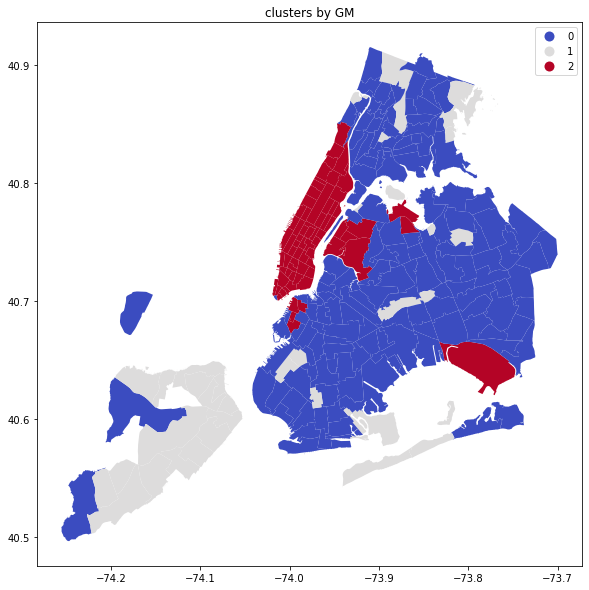

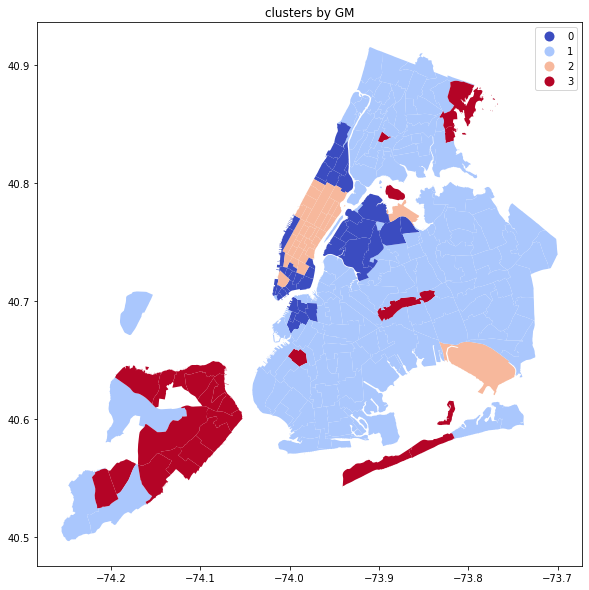

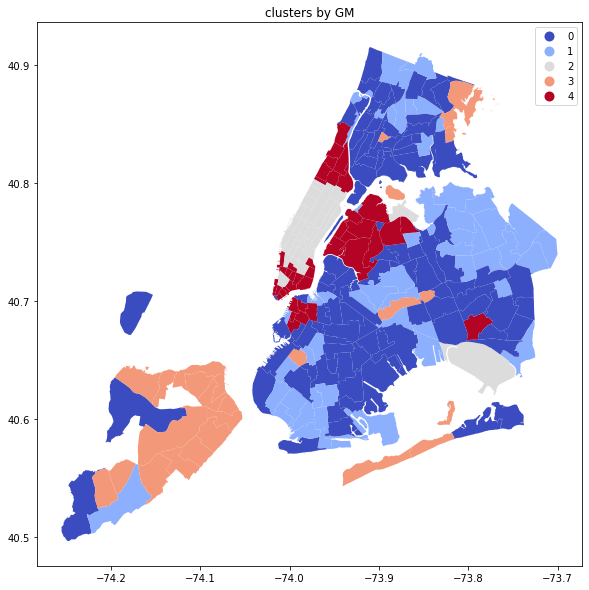

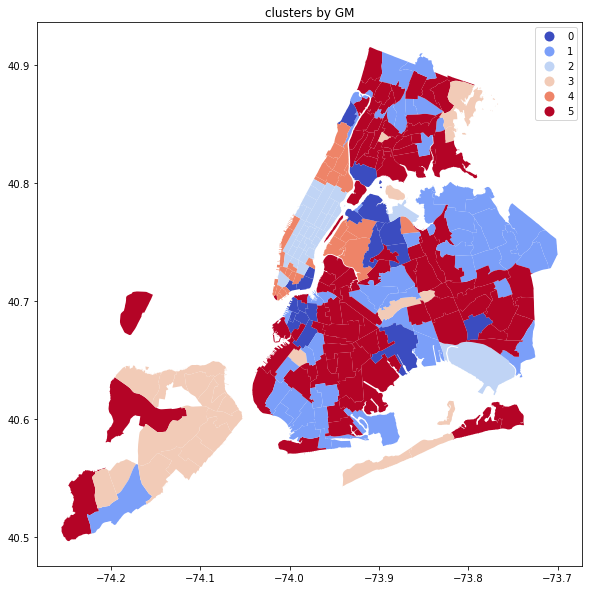

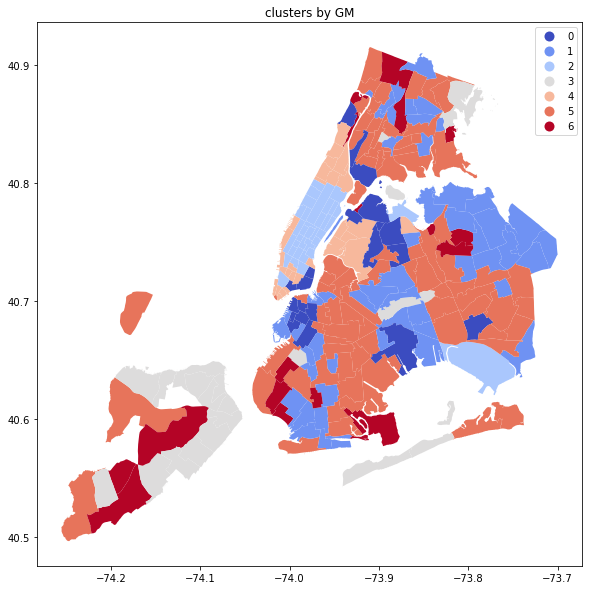

In [42]:
for i in range(6):
    dfmorning=dfmor_log
    gmm = GaussianMixture(n_components=i+2,random_state=100)
    res = gmm.fit(dfmorning[['logN_trips']])
    dfmorning['cluster']=gmm.predict(dfmorning[['logN_trips']])
    dfmorning = taxi.merge(dfmorning, left_on='location_i', right_on='PULocationID')
    dfmorning['cluster'] = dfmorning['cluster'].astype(str)
    
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
    dfmorning.plot(column='cluster',cmap='coolwarm', 
                                          legend=True,ax=ax)
    plt.title('clusters by GM')
    #print('Cluster assignments:',km.labels_)
    print('\nCluster centers:\n',res.means_)
    print('\nLog-likelihood per sample:',res.score(dfmorning[['logN_trips']]))

we can see that no matter how complicated our clusters form in the improved way, Manhattan, JFK and LaGuardia are usuallly in the same cluster which only contain these three locations. And the average trip count is really high for this cluster.